# Predicting if diabetic patience will be readmitted less than 30 days from discharge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to see all the columns or rows when u use .head()
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) OR
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)

In [2]:
missing_values = ['?']
data_set_id = pd.read_csv('IDs_mapping.csv')
data_set_diabetic = pd.read_csv('diabetic_data.csv', na_values=missing_values)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_set_id.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [4]:
data_set_diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# data_set_id = data_set_id[data_set_id.admission_type_id != 'discharge_disposition_id']
# data_set_id = data_set_id[data_set_id.admission_type_id != 'admission_source_id']

# data_set_id['admission_type_id'].dropna(inplace=True)
# data_set_diabetic['admission_type_id'].dropna(inplace=True)

# data_set_id['admission_type_id'] = data_set_id['admission_type_id'].astype(int)

# data_set_diabetic = data_set_diabetic.merge(data_set_id, how='inner', on='admission_type_id').head()

## Exploratory Data Analysis

In [5]:
print('ID', data_set_id.shape)
print('\n')
print('Diabetic data', data_set_diabetic.shape)

ID (67, 2)


Diabetic data (101766, 50)


In [6]:
data_set_id.nunique()

admission_type_id    32
description          58
dtype: int64

In [7]:
data_set_id['admission_type_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', nan,
       'discharge_disposition_id', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '30', '27', '28', '29', 'admission_source_id'], dtype=object)

In [8]:
data_set_id.isnull().sum()

admission_type_id    2
description          5
dtype: int64

**Dropping row 9 & 41 and all the nan columns as they do not provide enough information**

In [6]:
data_set_id.fillna('None', inplace = True)

In [10]:
data_set_id.shape

(67, 2)

In [7]:
data_set_id = data_set_id[data_set_id['admission_type_id'] != 'discharge_disposition_id']
data_set_id = data_set_id[data_set_id['admission_type_id'] != 'admission_source_id']

In [12]:
data_set_id.shape

(65, 2)

In [13]:
data_set_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 66
Data columns (total 2 columns):
admission_type_id    65 non-null object
description          65 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [14]:
data_set_id['admission_type_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'None', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '30', '27', '28', '29'], dtype=object)

In [15]:
data_set_diabetic['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [8]:
# display full coloum width
pd.set_option('display.max_colwidth', -1)

In [9]:
data_set_id[data_set_id['admission_type_id'].isin(['25',  '1',  '3',  '6',  '2',  '5', '11',  '7', '10',  '4', '14', '18',  '8', '13', '12', '16', '17',
       '22', '23',  '9', '20', '15', '24', '28', '19', '27']) ].sort_values('admission_type_id')

,admission_type_id,description
0,1,Emergency
42,1,Physician Referral
10,1,Discharged to home
19,10,Neonate discharged to another hospital for neonatal aftercare
51,10,Transfer from critial access hospital
20,11,Expired
52,11,Normal Delivery
53,12,Premature Delivery
21,12,Still patient or expected to return for outpatient services
54,13,Sick Baby


Cross referencing the "discharge_disposition_id" ids with the " IDs_mapping.csv" dataset, we realize that  
11,13,14,19,20,21 are related to death or hospice. So we will remove them as they won't be returning.

In [10]:
data_set_diabetic = data_set_diabetic[~data_set_diabetic['discharge_disposition_id'].isin([11,13,14,19,20,21])]

**Get Target binary variable based on if patient will re-admitted withing 30 days of discharge**

In [11]:
data_set_diabetic['target'] = (data_set_diabetic['readmitted'] == '<30').astype('int')

Replacing all NaN values in race, payer code and medical specialty with None

In [12]:
data_set_diabetic['race'] = data_set_diabetic['race'].fillna('None')
data_set_diabetic['payer_code'] = data_set_diabetic['payer_code'].fillna('None')
data_set_diabetic['medical_specialty'] = data_set_diabetic['medical_specialty'].fillna('None')

In [13]:
data_set_diabetic.groupby('medical_specialty').size().sort_values(ascending = False)

medical_specialty
None                                 48616
InternalMedicine                     14237
Emergency/Trauma                     7419 
Family/GeneralPractice               7252 
Cardiology                           5279 
Surgery-General                      3059 
Nephrology                           1539 
Orthopedics                          1392 
Orthopedics-Reconstructive           1230 
Radiologist                          1121 
Pulmonology                          854  
Psychiatry                           853  
Urology                              682  
ObstetricsandGynecology              669  
Surgery-Cardiovascular/Thoracic      642  
Gastroenterology                     538  
Surgery-Vascular                     525  
Surgery-Neuro                        462  
PhysicalMedicineandRehabilitation    391  
Oncology                             319  
Pediatrics                           253  
Neurology                            201  
Hematology/Oncology                 

In [14]:
top_10 = ['None','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
data_set_diabetic['med_spec'] = data_set_diabetic['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
data_set_diabetic.loc[~data_set_diabetic.med_spec.isin(top_10), 'med_spec'] = 'Other'

data_set_diabetic.groupby('med_spec').size()

med_spec
Cardiology                    5279 
Emergency/Trauma              7419 
Family/GeneralPractice        7252 
InternalMedicine              14237
Nephrology                    1539 
None                          48616
Orthopedics                   1392 
Orthopedics-Reconstructive    1230 
Other                         8199 
Radiologist                   1121 
Surgery-General               3059 
dtype: int64

In [23]:
data_set_diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target,med_spec
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,None,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,Other
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,None,None,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,None
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,None,None,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,None
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,None,None,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,None
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,None,None,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,None


In [15]:
data_set_diabetic = pd.get_dummies(data=data_set_diabetic, columns=['gender', 'age', 'race', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'med_spec', 'payer_code'], drop_first=True)

In [25]:
data_set_diabetic.head()

,encounter_id,patient_nbr,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted,target,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_None,race_Other,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_None,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_None,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC
0,2278392,8222157,NaN,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,149190,55629189,NaN,1,1,7,3,None,59,0,18,0,0,0,276,250.01,255,9,>30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,64410,86047875,NaN,1,1,7,2,None,11,5,13,2,0,1,648,250,V27,6,NO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,500364,82442376,NaN,1,1,7,2,None,44,1,16,0,0,0,8,250.43,403,7,NO,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,16680,42519267,NaN,1,1,7,1,None,51,0,8,0,0,0,197,157,250,5,NO,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
data_set_diabetic.drop(['encounter_id', 'patient_nbr', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'readmitted'], axis=1, inplace=True)

In [17]:
data_drop_na = data_set_diabetic.dropna(how='any')

In [18]:
data_drop_na.isnull().sum().sort_values(ascending = False).head(10)

payer_code_WC         0
payer_code_UN         0
max_glu_serum_>300    0
max_glu_serum_None    0
max_glu_serum_Norm    0
A1Cresult_>8          0
A1Cresult_None        0
A1Cresult_Norm        0
metformin_No          0
metformin_Steady      0
dtype: int64

In [29]:
data_drop_na.shape

(3125, 112)

In [19]:
data_drop_na = pd.get_dummies(data=data_drop_na, columns=['weight'], drop_first=True)

In [31]:
data_drop_na.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_None,race_Other,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_None,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_None,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100)
1102,6,1,17,2,68,3,15,0,0,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1108,6,5,17,9,74,5,27,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1132,6,1,17,5,71,5,23,0,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1136,6,1,17,3,56,3,15,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1190,6,6,17,11,78,0,18,0,0,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
data_drop_na['admission_type_id'].nunique()

6

In [33]:
data_drop_na['admission_source_id'].nunique()

6

In [34]:
data_drop_na['discharge_disposition_id'].nunique()

8

**Since the above columns have small amounts of unique values, we will convert them to categorical variables**

In [21]:
data_drop_na = pd.get_dummies(data=data_drop_na, columns=['admission_type_id', 'admission_source_id', 'discharge_disposition_id'], drop_first=True)

In [36]:
data_drop_na.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_None,race_Other,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_None,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_None,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_17,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_18
1102,2,68,3,15,0,0,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1108,9,74,5,27,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1132,5,71,5,23,0,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1136,3,56,3,15,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1190,11,78,0,18,0,0,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [37]:
data_drop_na.shape

(3125, 133)

In [22]:
cols = [col for col in data_drop_na if col != 'target'] + ['target']
data_drop_na = data_drop_na[cols]

In [39]:
data_drop_na.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_None,race_Other,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_None,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_None,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_17,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_18,target
1102,2,68,3,15,0,0,0,6,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1108,9,74,5,27,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1132,5,71,5,23,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1136,3,56,3,15,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1190,11,78,0,18,0,0,1,7,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [23]:
X=data_drop_na.drop(['target'], axis=1)
y=data_drop_na['target']

In [41]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [42]:
data_drop_na_feat = pd.DataFrame(scaled_features, columns=data_drop_na.columns[:-1])

In [43]:
data_drop_na_feat.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_Asian,race_Caucasian,race_Hispanic,race_None,race_Other,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_None,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_None,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_17,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_18
0,-0.933505,0.794343,0.836741,-0.172887,-0.583259,-0.308559,-0.470229,-1.276457,1.029557,0.0,-0.076114,-0.150262,-0.167214,-0.281864,2.302260,-0.542214,-0.644444,-0.444205,-0.162088,-0.050661,0.316172,0.0,-0.213308,-0.098453,0.0,0.0,0.0,-0.242823,0.349403,-0.159997,0.531828,-0.495997,-0.127515,0.110949,-0.104879,-0.0358,0.103309,-0.098453,-0.030999,0.025306,-0.025306,0.0,0.253004,-0.236100,-0.071738,0.0,0.430707,-0.390239,-0.130083,0.377619,-0.34361,-0.107955,-0.017891,0.333037,-0.322258,-0.064633,0.266344,-0.258683,-0.050661,0.071738,-0.069449,-0.017891,0.0,0.0,0.0,0.0,-0.017891,0.0,-1.577252,1.871599,-0.189201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711354,0.664395,0.0,-0.226893,-0.386966,0.0,-0.966327,0.0,0.0,-0.152474,0.0,-0.379276,-0.017891,-0.179931,-0.247226,-0.196344,0.0,-0.201559,-0.774663,-0.087974,0.0,1.612523,0.0,0.0,0.0,0.0,-0.078212,-0.367594,-0.050661,-0.124898,-0.495997,-0.218985,-0.104879,-0.059434,-0.172203,-0.619652,1.175525,-0.392956,-0.561951,-0.025306,-0.030999,2.321765,-0.214126,-0.233825,-0.205819,-0.827427,2.55541,-0.080257,-0.424424,-0.062087,-0.139914,-0.472326,-0.050661,-0.101715
1,1.413401,1.110368,1.955380,1.345438,-0.583259,-0.308559,-0.470229,-0.625204,-0.971292,0.0,-0.076114,-0.150262,-0.167214,-0.281864,-0.434356,-0.542214,-0.644444,2.251213,-0.162088,-0.050661,-3.162834,0.0,4.688064,-0.098453,0.0,0.0,0.0,-0.242823,0.349403,-0.159997,0.531828,-0.495997,-0.127515,0.110949,-0.104879,-0.0358,0.103309,-0.098453,-0.030999,0.025306,-0.025306,0.0,-3.952511,4.235492,-0.071738,0.0,0.430707,-0.390239,-0.130083,0.377619,-0.34361,-0.107955,-0.017891,0.333037,-0.322258,-0.064633,0.266344,-0.258683,-0.050661,0.071738,-0.069449,-0.017891,0.0,0.0,0

In [44]:
X = data_drop_na_feat
y = data_drop_na['target']

count NaN values

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

most common type

In [ ]:
df['num-of-doors'].value_counts().idxmax()

In [45]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

print('Prevalence:%.3f'%calc_prevalence(data_drop_na['target'].values))

Prevalence:0.114


In [24]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

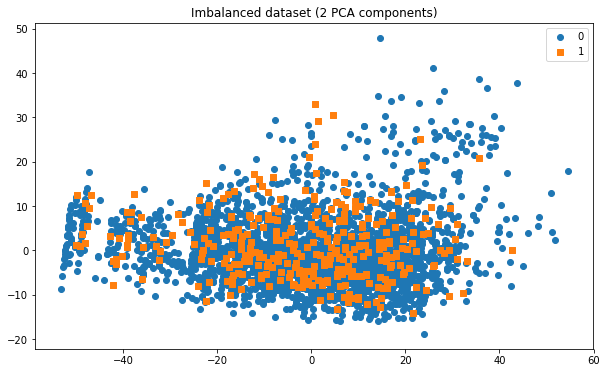

In [25]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10,6))
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#parameter grid
parameters={"C":np.logspace(-4,4,20), "penalty":["l2"], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'fit_intercept':[True,False], 'multi_class':['multinomial'], 'class_weight': ['balanced'] }

grid = GridSearchCV(LogisticRegression(), parameters, verbose=3, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 1119 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 1585 out of 1600 | elapsed:  1.0min remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  1.0min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGEN

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'multi_clas

In [28]:
# View The Best Parameters
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best fit_intercept:', grid.best_estimator_.get_params()['fit_intercept'])
print('Best solver:', grid.best_estimator_.get_params()['solver'])
print("accuracy :",grid.best_score_)

Best C: 0.03359818286283781
Best penalty: l2
Best fit_intercept: True
Best solver: lbfgs
accuracy : 0.6863265049641825


In [150]:
# do you balance the test set before doing predictions????

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the Test set results
y_pred = grid.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[552 277]
 [ 47  62]]


              precision    recall  f1-score   support

           0       0.92      0.67      0.77       829
           1       0.18      0.57      0.28       109

    accuracy                           0.65       938
   macro avg       0.55      0.62      0.52       938
weighted avg       0.84      0.65      0.72       938



In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

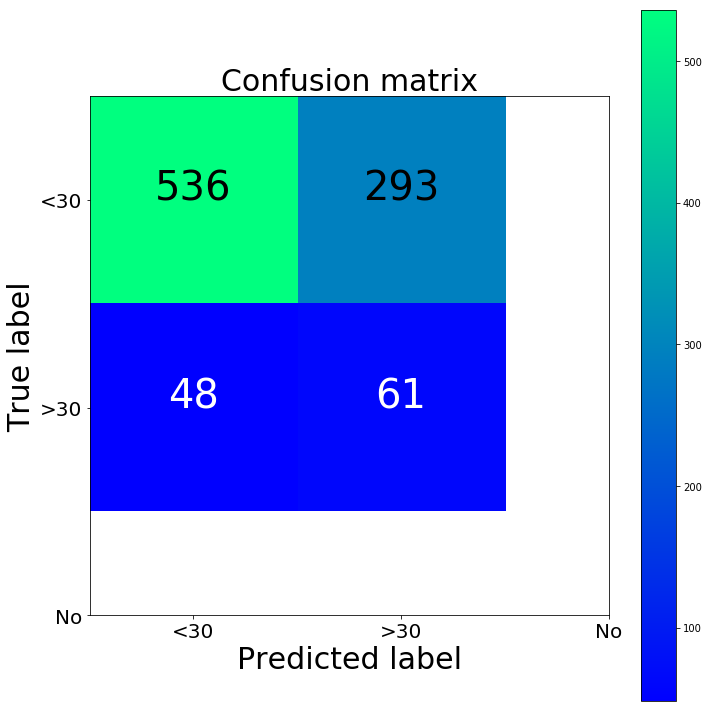

[[536 293]
 [ 48  61]]


In [70]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<30','>30', 'No'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

NameError: name 'y_pred' is not defined

**Using the under-sampling data**

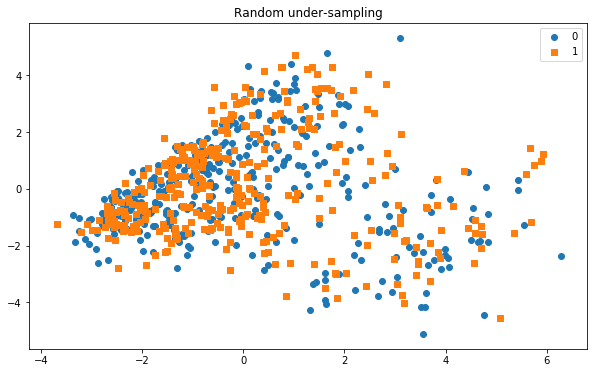

In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_sample(X_pca, y)

plt.figure(figsize=(10,6))
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [50]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=101)

In [53]:
lgr_rus = LogisticRegression(C= 1.623776739188721, penalty= 'l2', fit_intercept= True, solver= 'newton-cg')

In [54]:
lgr_rus.fit(X_train_rus, y_train_rus)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred_rus = lgr_rus.predict(X_test_rus)

print(confusion_matrix(y_test_rus,y_pred_rus))
print('\n')
print(classification_report(y_test_rus,y_pred_rus))

[[69 53]
 [42 50]]


              precision    recall  f1-score   support

           0       0.62      0.57      0.59       122
           1       0.49      0.54      0.51        92

    accuracy                           0.56       214
   macro avg       0.55      0.55      0.55       214
weighted avg       0.56      0.56      0.56       214



In [64]:
accuracy, precision, recall, f1 = get_metrics(y_test_rus, y_pred_rus)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.556, precision = 0.563, recall = 0.556, f1 = 0.558


**Using over-sampling**

2413 new random picked points


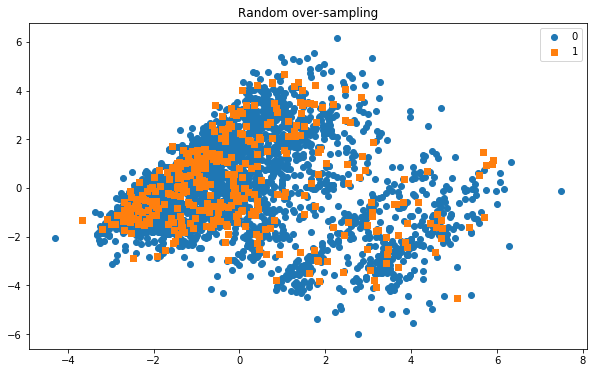

In [131]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_pca, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plt.figure(figsize=(10,6))
plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [132]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=101)

In [133]:
lgr_ros = LogisticRegression(C= 1.623776739188721, penalty= 'l2', fit_intercept= True, solver= 'newton-cg')

In [134]:
lgr_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred_ros = lgr_ros.predict(X_test_ros)

print(confusion_matrix(y_test_ros,y_pred_ros))
print('\n')
print(classification_report(y_test_ros,y_pred_ros))

[[514 309]
 [533 306]]


              precision    recall  f1-score   support

           0       0.49      0.62      0.55       823
           1       0.50      0.36      0.42       839

    accuracy                           0.49      1662
   macro avg       0.49      0.49      0.49      1662
weighted avg       0.49      0.49      0.48      1662



In [95]:
accuracy, precision, recall, f1 = get_metrics(y_test_ros, y_pred_ros)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.552, precision = 0.553, recall = 0.552, f1 = 0.551


**Using SMOTE**

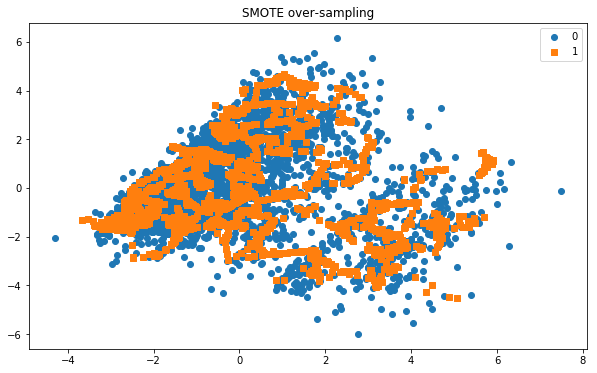

In [136]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_pca, y)

plt.figure(figsize=(10,6))
plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [97]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=101)

In [98]:
lgr_sm = LogisticRegression(C= 1.623776739188721, penalty= 'l2', fit_intercept= True, solver= 'newton-cg')

In [99]:
lgr_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred_sm = lgr_sm.predict(X_test_sm)

print(confusion_matrix(y_test_sm,y_pred_sm))
print('\n')
print(classification_report(y_test_sm,y_pred_sm))

[[487 336]
 [461 378]]


              precision    recall  f1-score   support

           0       0.51      0.59      0.55       823
           1       0.53      0.45      0.49       839

    accuracy                           0.52      1662
   macro avg       0.52      0.52      0.52      1662
weighted avg       0.52      0.52      0.52      1662



In [101]:
accuracy, precision, recall, f1 = get_metrics(y_test_sm, y_pred_sm)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.520, precision = 0.522, recall = 0.520, f1 = 0.518


In [ ]:
data_set_diabetic.head()

In [ ]:
data_set_diabetic['insulin'].unique()

In [ ]:
data_drop_na = data_set_diabetic.dropna(subset=['weight'])

In [ ]:
data_drop_na.shape

In [ ]:
data_drop_na.head()

In [ ]:
# list = []
# list = data_set_diabetic['age']
# #data_set_id['admission_type_id'] = data_set_id['admission_type_id'].astype(int)

# list2 = []
# for i in  range(1, len(list)): 
    
#     list2.append(list[i].strip()[1:-1].split('-'))

In [ ]:
# list3 = []
# for i, element in enumerate(list2):
#     list3.append((int(element[0]) + int(element[1]))/2)

**Doing inputation to by column to make up of 96% missing value for the weight since the weight is a major factor in diatetes**

In [ ]:
# to do inputations on numerical values:
# df.select_dtypes(include='float').fillna(\
#      df.select_dtypes(include='float').mean().iloc[0],\                    
#      inplace=True)

#data_set_diabetic = data_set_diabetic.fillna(data_set_diabetic.mode().iloc[0])


In [ ]:
data_drop_na = pd.get_dummies(data=data_drop_na, columns=['weight', 'gender', 'age', 'race', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], drop_first=True)

In [ ]:
data_drop_na.head()

In [ ]:
data_drop_na.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [ ]:
data_drop_na.shape

In [ ]:
data_drop_na['readmitted'].nunique()

In [ ]:
factor = pd.factorize(data_drop_na['readmitted'])

In [ ]:
data_drop_na.readmitted = factor[0]

In [ ]:
definitions = factor[1]

In [ ]:
data_drop_na['readmitted'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

X=data_drop_na.drop(['readmitted'], axis=1).values
y=data_drop_na['readmitted'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<30','>30', 'No'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#parameter grid
parameters={"C":np.logspace(-4,4,20), "penalty":["l2"], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'fit_intercept':[True,False], 'multi_class':['multinomial'] }

In [ ]:
grid = GridSearchCV(LogisticRegression(), parameters, verbose=3, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
# View The Best Parameters
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best fit_intercept:', grid.best_estimator_.get_params()['fit_intercept'])
print('Best solver:', grid.best_estimator_.get_params()['solver'])
print("accuracy :",grid.best_score_)

In [ ]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<30','>30', 'No'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001]}
gridSVC = GridSearchCV(SVC(), param_grid, verbose=3, cv=10, n_jobs=-1)
gridSVC.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
# Predicting the Test set results
y_pred = gridSVC.predict(X_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
from sklearn.svm import NuSVC

clf = NuSVC(nu=0.5)
clf.fit(X_train, y_train)

### Multiclass as One-Vs-The-Rest

In [ ]:
#parameter grid
parameters={"C":np.logspace(-4,4,20), "penalty":["l2"], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'fit_intercept':[True,False], 'multi_class':['ovr'] }

In [ ]:
grid = GridSearchCV(LogisticRegression(), parameters, verbose=3, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

# Dropping Weight Coloumn and using all data

In [ ]:
data_drop_weight = data_set_diabetic

In [ ]:
data_drop_weight.drop(['weight', 'encounter_id', 'patient_nbr', 'admission_type_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [ ]:
data_drop_weight.head()

In [ ]:
data_drop_weight = pd.get_dummies(data=data_drop_weight, columns=['gender', 'age', 'race', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], drop_first=True)

In [ ]:
data_drop_weight.head()

In [ ]:
factor = pd.factorize(data_drop_weight['readmitted'])
data_drop_weight.readmitted = factor[0]
definitions = factor[1]

In [ ]:
X=data_drop_weight.drop(['readmitted'], axis=1).values
y=data_drop_weight['readmitted'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
#parameter grid
parameters={"C":np.logspace(-4,4,20), "penalty":["l2"], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'fit_intercept':[True,False], 'multi_class':['multinomial'] }
grid = GridSearchCV(LogisticRegression(), parameters, verbose=3, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
# View The Best Parameters
print('Best C:', grid.best_estimator_.get_params()['C'])
print('Best penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best fit_intercept:', grid.best_estimator_.get_params()['fit_intercept'])
print('Best solver:', grid.best_estimator_.get_params()['solver'])
print("accuracy :",grid.best_score_)

In [ ]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['<30','>30', 'No'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)